Inteligencia Artificial II

Se Construyo un modelo para la deteccion de hojas buenasy malas de plantas de platano.

Estudiante:Jose Fernando Alfaro Ayzama

In [2]:
# Instala ultralytics
%pip install ultralytics
# Importa libreria ultralytics
import ultralytics
# Revisa y visualiza las capacidades computacionales del computador virtual
ultralytics.checks()

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/107.7 GB disk)


In [3]:
#Importa la clase YOLO del paquete ultralytics.
from ultralytics import YOLO
#Importa la clase YOLO del paquete ultralytics.
from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Deteccion_hojas/dataset

/content/drive/MyDrive/Deteccion_hojas/dataset


In [ ]:
%pip install --upgrade typing_extensions

In [ ]:
import cv2
import albumentations as A
import os
import shutil

In [ ]:
import os
# reemplaza con la ruta de tu carpeta
num_archivos = len(os.listdir('/content/drive/MyDrive/Deteccion_hojas/dataset/train/images'))
print('Número de archivos en la carpeta:', num_archivos)

Número de archivos en la carpeta: 11304


In [ ]:
import os
# reemplaza con la ruta de tu carpeta
num_archivos = len(os.listdir('/content/drive/MyDrive/Deteccion_hojas/dataset/test/images'))
print('Número de archivos en la carpeta:', num_archivos)

Número de archivos en la carpeta: 246


In [ ]:
import os
# reemplaza con la ruta de tu carpeta
num_archivos = len(os.listdir('/content/drive/MyDrive/Deteccion_hojas/dataset/valid/images'))
print('Número de archivos en la carpeta:', num_archivos)

Número de archivos en la carpeta: 426


In [ ]:
!yolo task=detect mode=train model=yolov8m-seg.pt data=/content/drive/MyDrive/Deteccion_hojas/dataset/data.yaml epochs=10 imgsz=640 save_period=3

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/drive/MyDrive/Deteccion_hojas/dataset/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=3, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_n

In [ ]:
!ls /content/drive/MyDrive/Deteccion_hojas/dataset/runs/segment/train2/weights

best.pt  epoch3.pt  epoch6.pt  epoch9.pt  last.pt


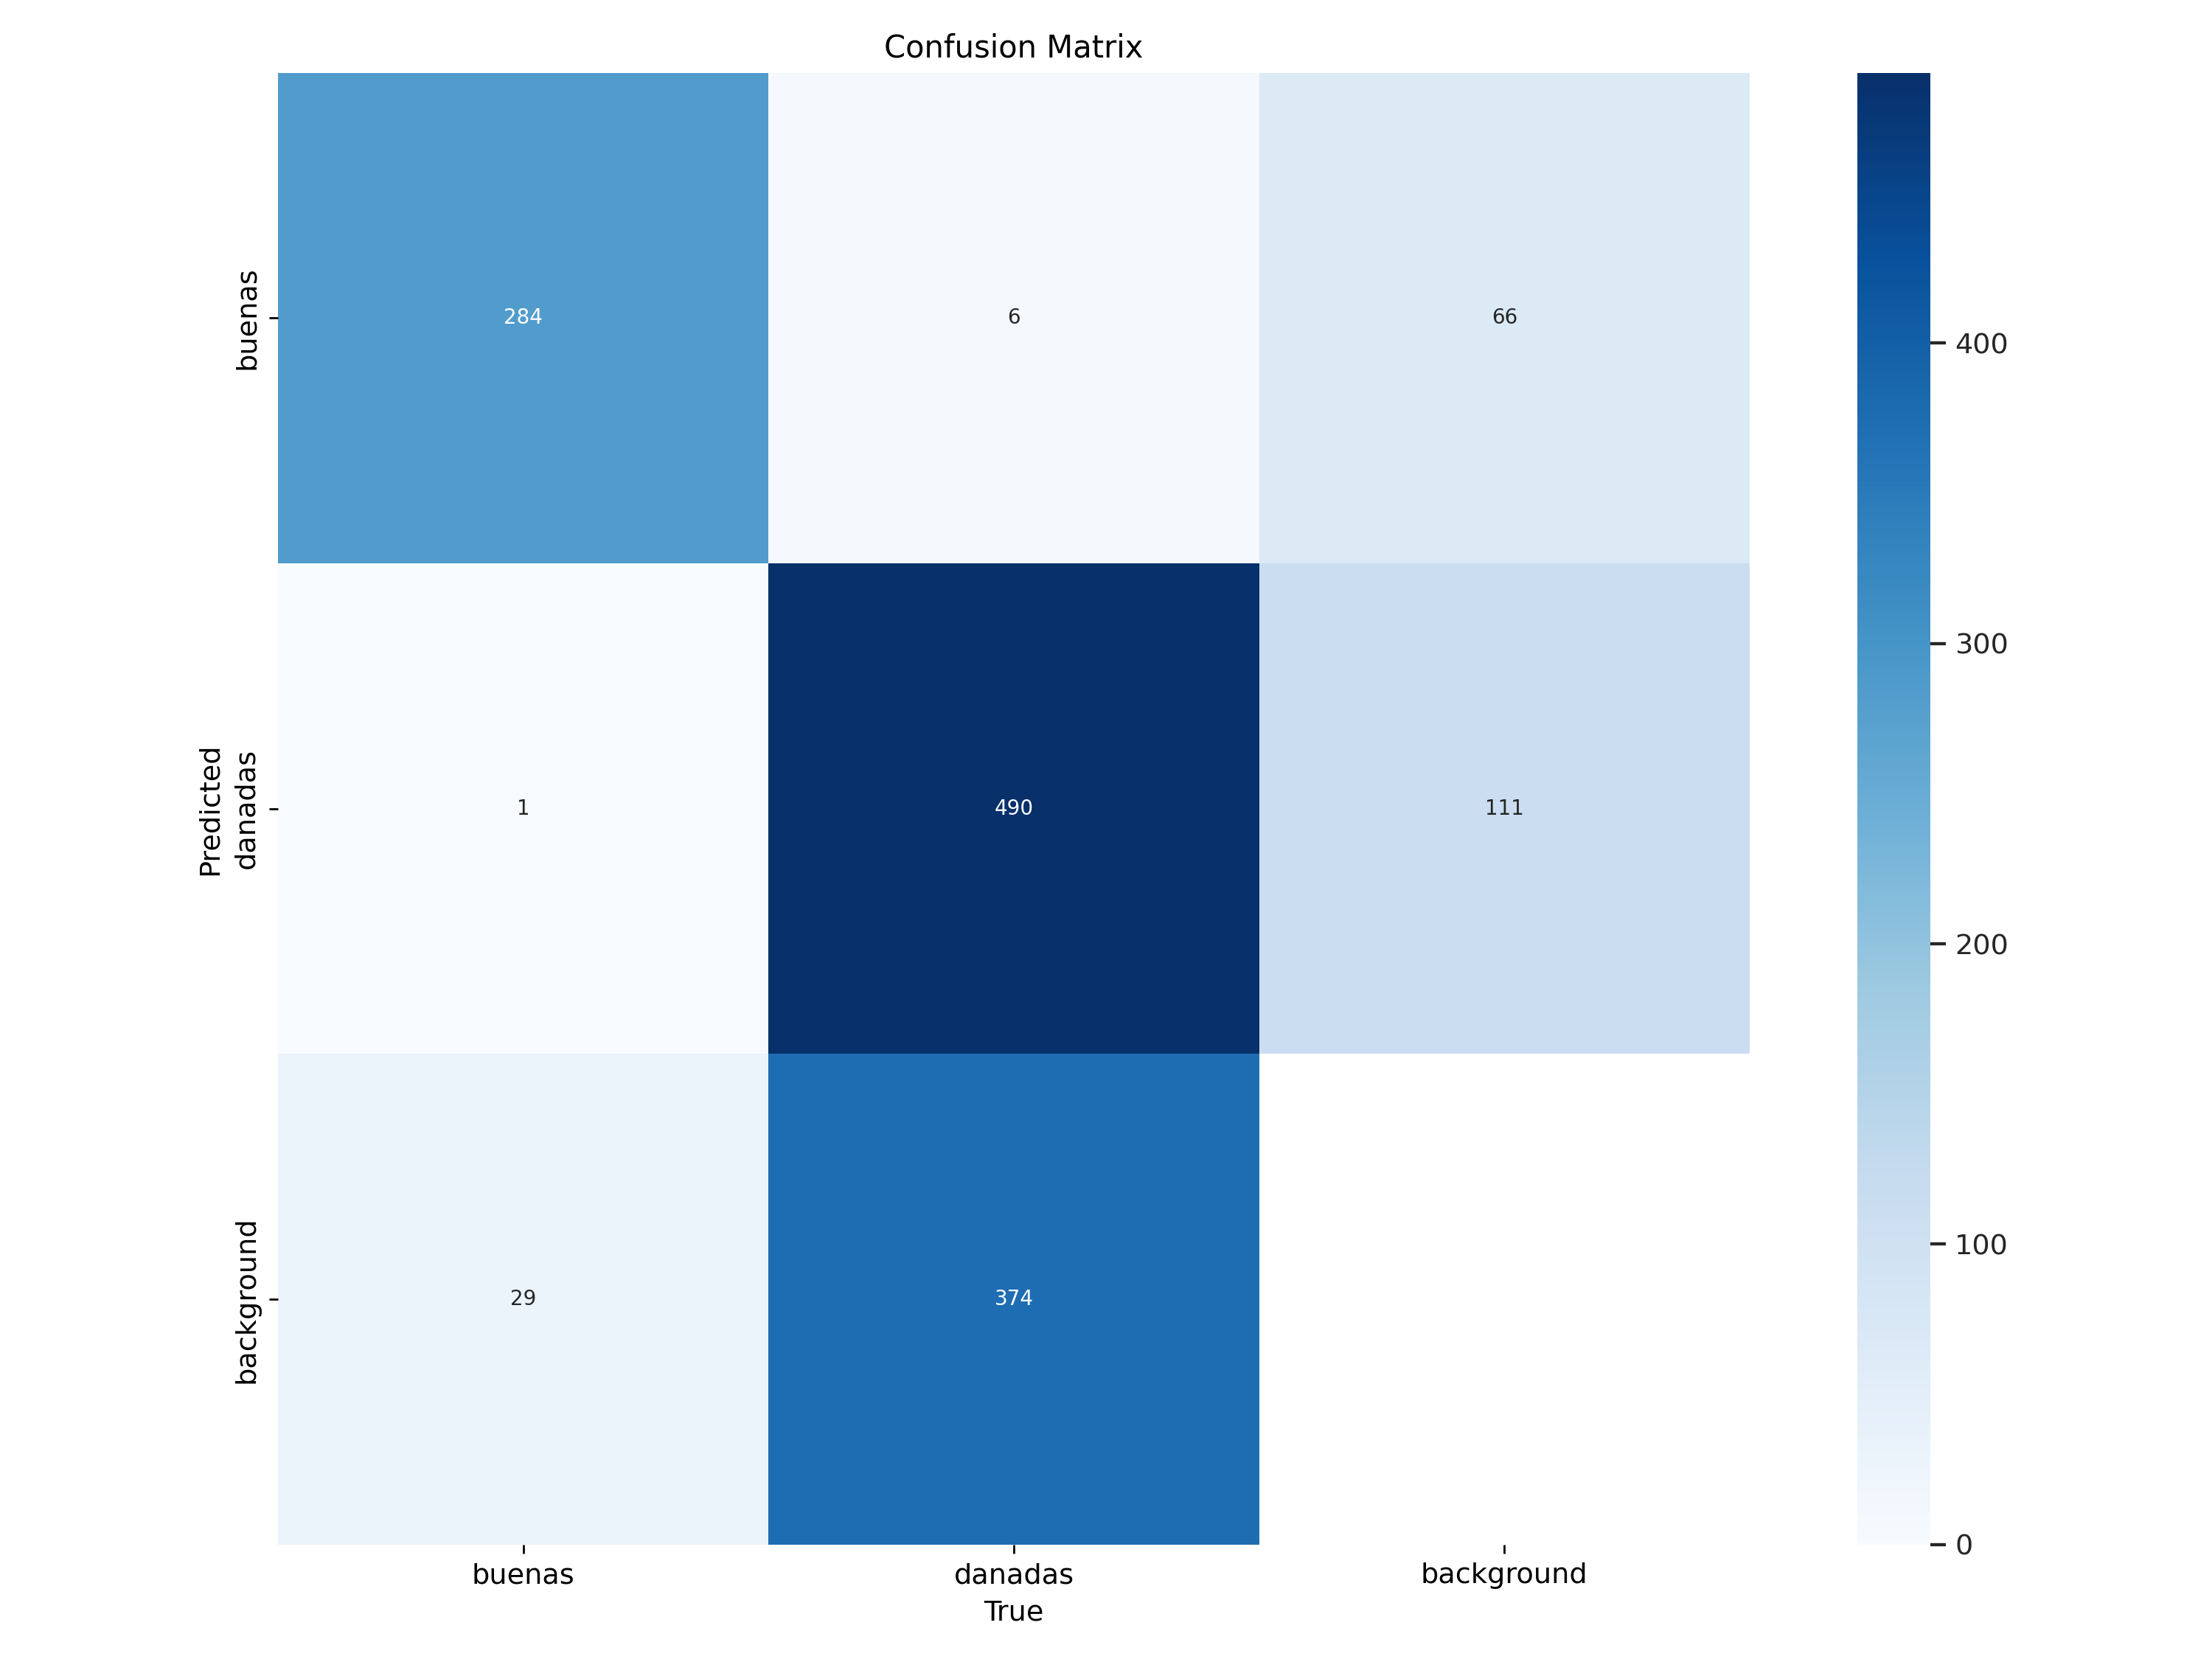

In [ ]:
Image(filename='/content/drive/MyDrive/Deteccion_hojas/dataset/runs/segment/train2/confusion_matrix.png', width=800)

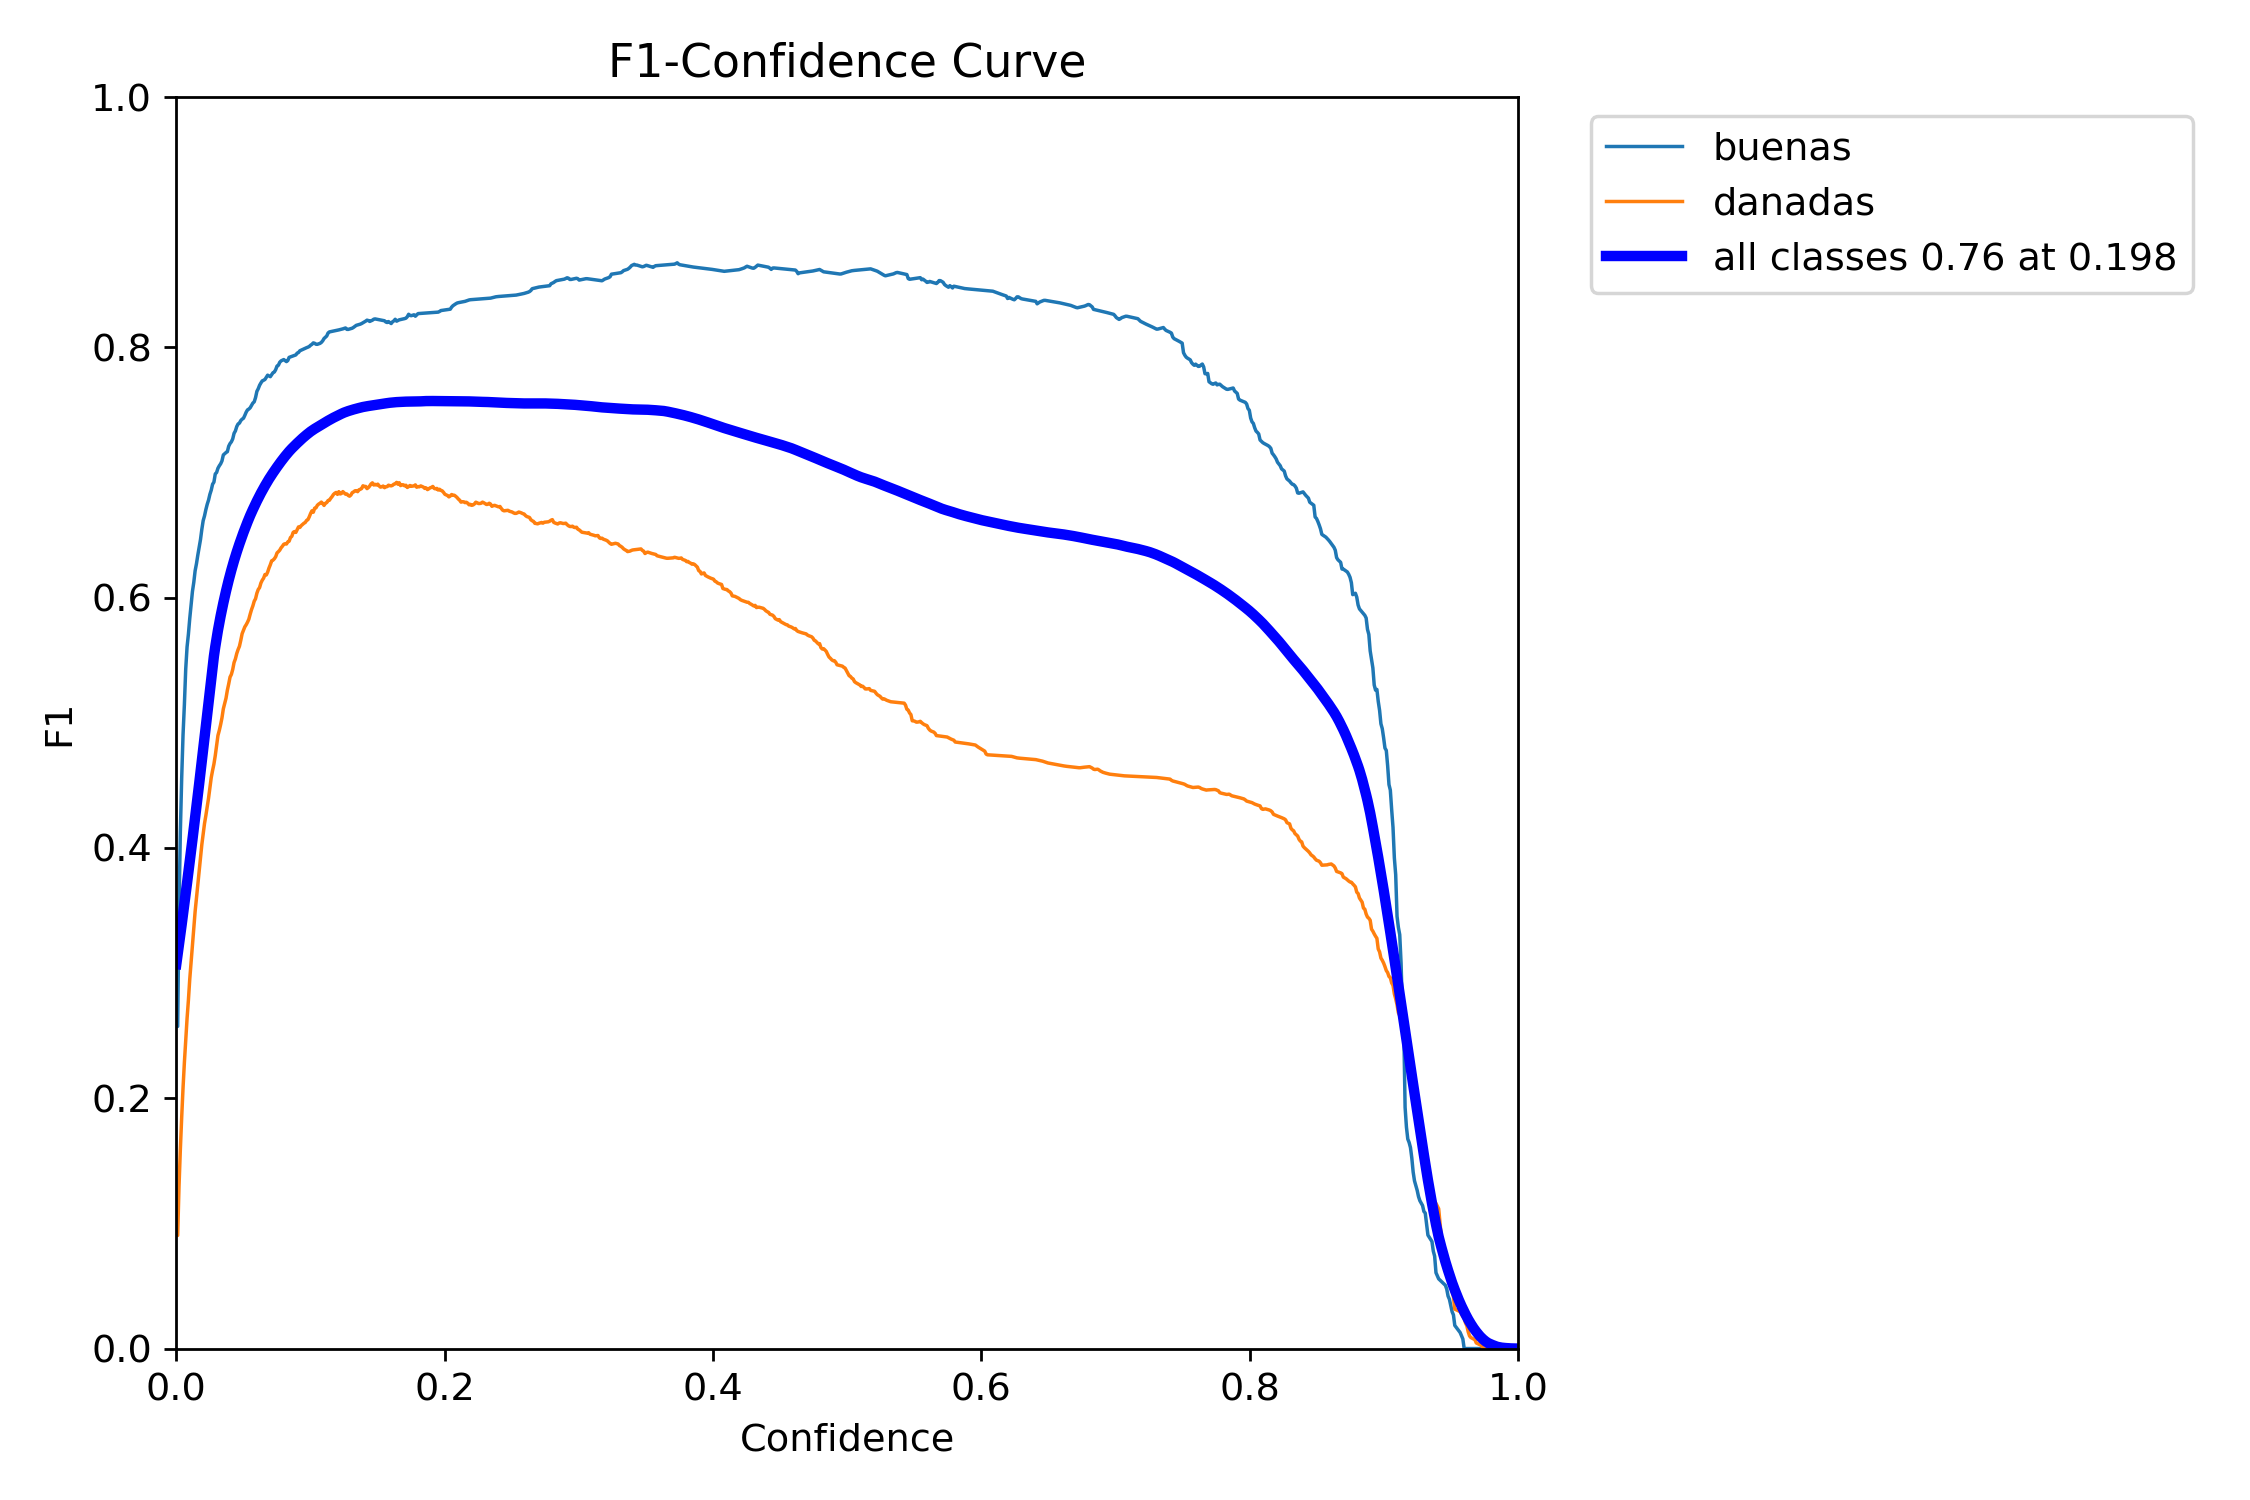

In [ ]:
Image(filename='/content/drive/MyDrive/Deteccion_hojas/dataset/runs/segment/train2/BoxF1_curve.png', width=800)

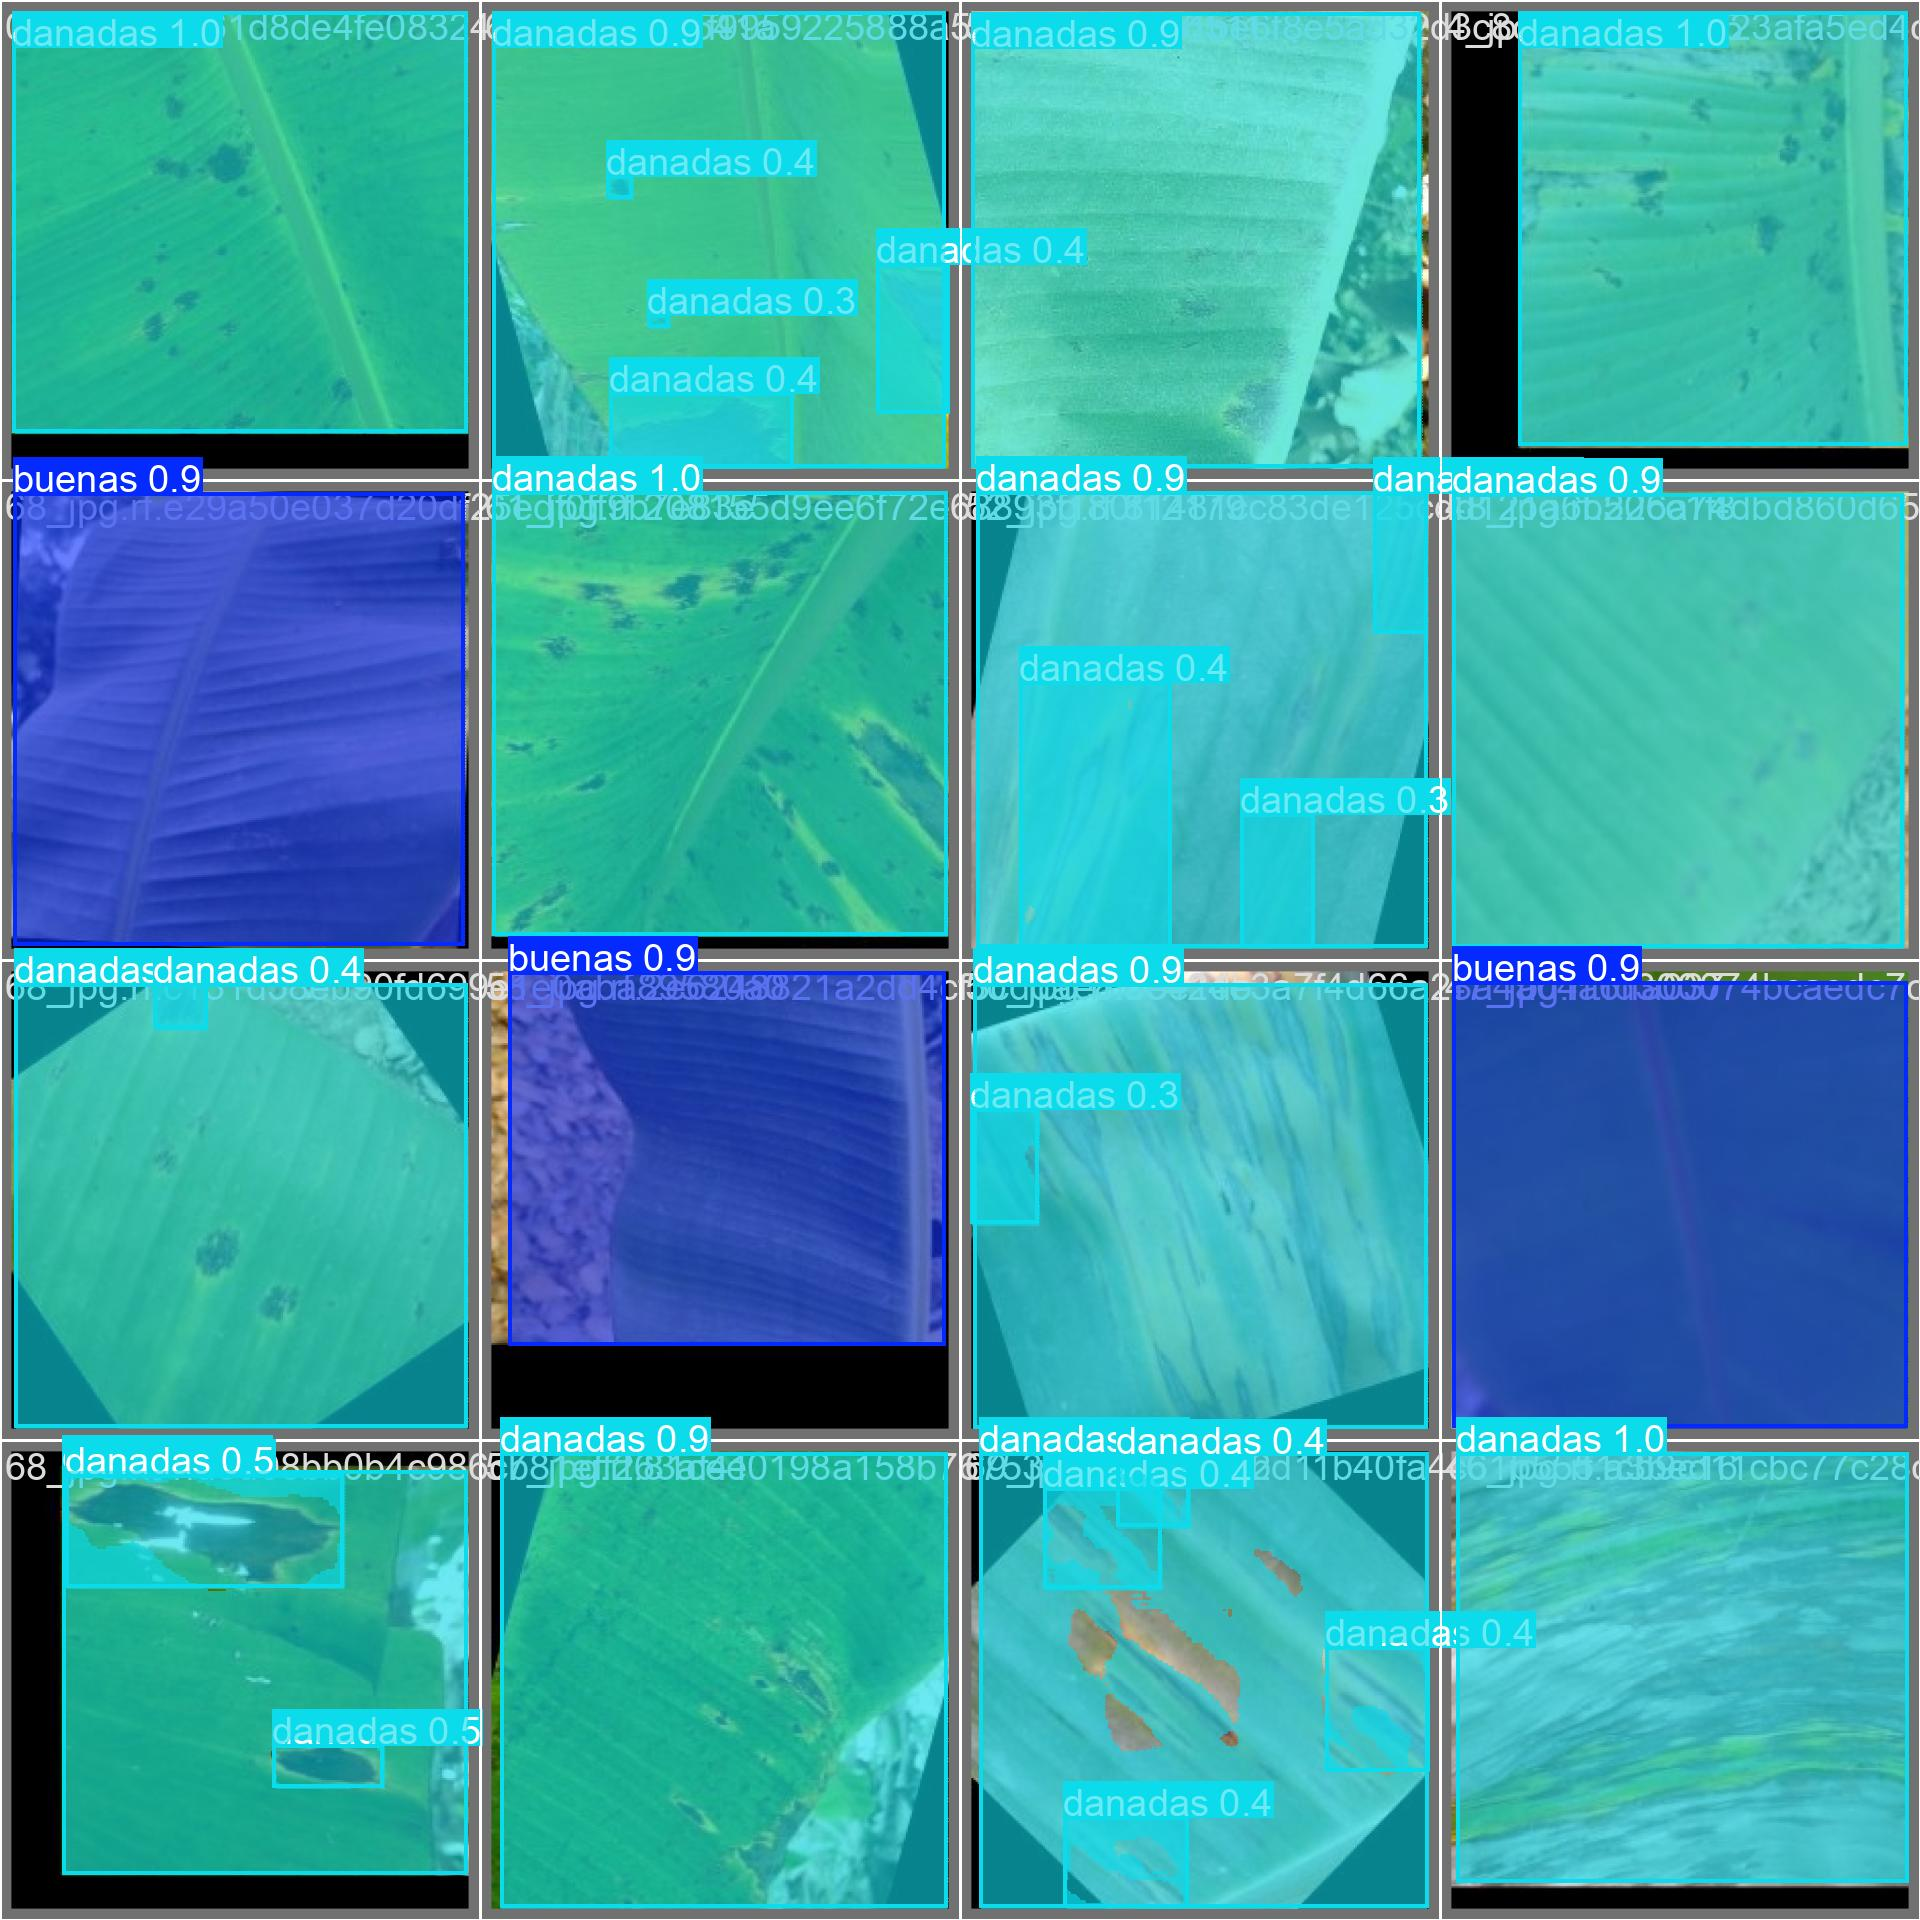

In [ ]:
Image(filename='/content/drive/MyDrive/Deteccion_hojas/dataset/runs/segment/train2/val_batch0_pred.jpg', width=800)

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Deteccion_hojas/dataset/runs/segment/train2/weights/best.pt data=/content/drive/MyDrive/Deteccion_hojas/dataset/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/drive/MyDrive/Deteccion_hojas/dataset/valid/labels.cache... 426 images, 0 backgrounds, 0 corrupt: 100% 426/426 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0% 0/27 [00:43<?, ?it/s]
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 591, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 517, in val
 

In [ ]:
import cv2
from IPython.display import Image
from ultralytics import YOLO

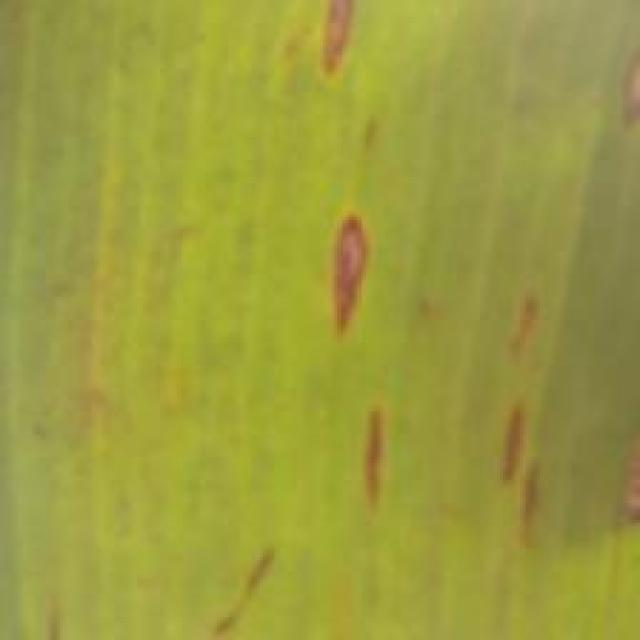

In [ ]:
import cv2
from IPython.display import Image
from ultralytics import YOLO
img_name='100_jpg.rf.7671457f16f62e0d5c4dd4220239e548'
img =cv2.imread(f"/content/drive/MyDrive/Deteccion_hojas/dataset/test/images{img_name}.jpg")
# Mostrar la imagen en una ventana
Image(filename=f"/content/drive/MyDrive/Deteccion_hojas/dataset/test/images/{img_name}.jpg", width=600)


0: 640x640 1 danadas, 2172.1ms
Speed: 5.2ms preprocess, 2172.1ms inference, 10.8ms postprocess per image at shape (1, 3, 640, 640)


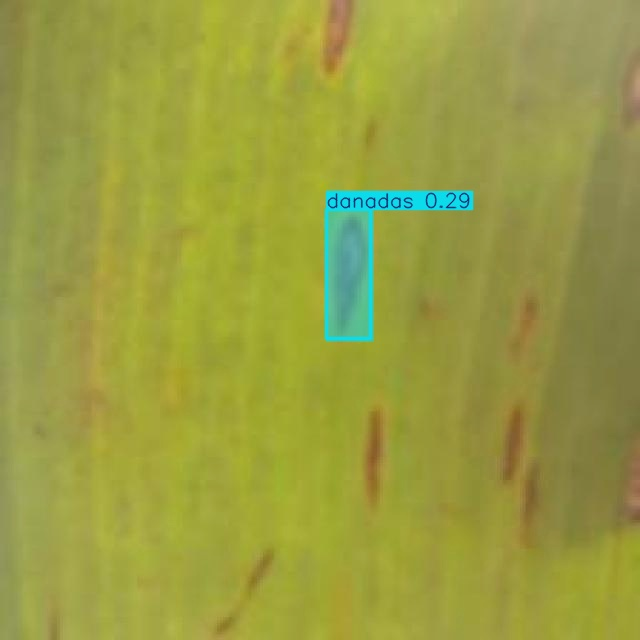

Class: danadas, Bounding Box: (326, 209, 370, 338)


In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image

# Cargar el modelo entrenado con YOLOv8
model = YOLO("/content/drive/MyDrive/Deteccion_hojas/dataset/runs/segment/train2/weights/best.pt")

# Cargar la imagen y hacer la predicción
img_path = "/content/drive/MyDrive/Deteccion_hojas/dataset/test/images/100_jpg.rf.7671457f16f62e0d5c4dd4220239e548.jpg"  # Cambia esto a la ruta de tu imagen
img = cv2.imread(img_path)
pred = model.predict(img)[0]

# Extracción de las predicciones
results = []
for detection in pred.boxes:
    class_id = int(detection.cls.item())  # Convertir el tensor a un entero
    class_name = model.names[class_id]
    x1, y1, x2, y2 = map(int, detection.xyxy[0].tolist())  # Convertir las coordenadas a una lista de enteros
    results.append({
        'class': class_name,
        'bounding_box': (x1, y1, x2, y2)
    })

# Guardar las predicciones visualizadas
pred_img = pred.plot()
output_img_path = f"/content/drive/MyDrive/Deteccion_hojas/Prediciones/{img_name}.jpg"
cv2.imwrite(output_img_path, pred_img)

# Mostrar la imagen con las detecciones
display(Image.open(output_img_path))

# Imprimir resultados
for result in results:
    print(f"Class: {result['class']}, Bounding Box: {result['bounding_box']}")



0: 480x640 1 danadas, 2180.8ms
Speed: 3.2ms preprocess, 2180.8ms inference, 4.2ms postprocess per image at shape (1, 3, 480, 640)


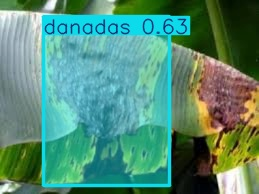

Class: danadas, Bounding Box: (43, 16, 169, 185)


In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image

# Cargar el modelo YOLOv8
model = YOLO("/content/drive/MyDrive/Deteccion_hojas/dataset/runs/segment/train2/weights/best.pt")

# Cargar la imagen y hacer la predicción
img_path = "/content/download.jpg"  # Cambia esto a la ruta de tu imagen
img = cv2.imread(img_path)
pred = model.predict(img)[0]

# Extracción de las predicciones
results = []
for detection in pred.boxes:
    class_id = int(detection.cls.item())  # Convertir el tensor a un entero
    class_name = model.names[class_id]
    x1, y1, x2, y2 = map(int, detection.xyxy[0].tolist())  # Convertir las coordenadas a una lista de enteros
    results.append({
        'class': class_name,
        'bounding_box': (x1, y1, x2, y2)
    })

# Guardar las predicciones visualizadas
pred_img = pred.plot()
output_img_path = f"/content/drive/MyDrive/Deteccion_hojas/Prediciones/{img_name}.jpg"
cv2.imwrite(output_img_path, pred_img)

# Mostrar la imagen con las detecciones
display(Image.open(output_img_path))

# Imprimir resultados
for result in results:
    print(f"Class: {result['class']}, Bounding Box: {result['bounding_box']}")


0: 640x640 10 buenass, 2374.0ms
Speed: 8.6ms preprocess, 2374.0ms inference, 38.6ms postprocess per image at shape (1, 3, 640, 640)


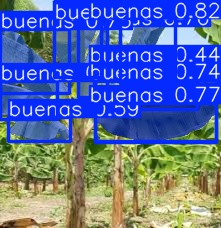

Class: buenas, Bounding Box: (120, 0, 175, 83)
Class: buenas, Bounding Box: (54, 1, 101, 77)
Class: buenas, Bounding Box: (95, 103, 216, 141)
Class: buenas, Bounding Box: (95, 80, 216, 142)
Class: buenas, Bounding Box: (0, 81, 57, 119)
Class: buenas, Bounding Box: (0, 29, 69, 93)
Class: buenas, Bounding Box: (78, 26, 107, 97)
Class: buenas, Bounding Box: (8, 117, 70, 141)
Class: buenas, Bounding Box: (146, 63, 219, 84)
Class: buenas, Bounding Box: (94, 81, 197, 109)


In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image

# Cargar el modelo YOLOv8
model = YOLO("/content/drive/MyDrive/Deteccion_hojas/dataset/runs/segment/train2/weights/best.pt")

# Cargar la imagen y hacer la predicción
img_path = "/content/images.jpg"  # Cambia esto a la ruta de tu imagen
img = cv2.imread(img_path)
pred = model.predict(img)[0]

# Extracción de las predicciones
results = []
for detection in pred.boxes:
    class_id = int(detection.cls.item())  # Convertir el tensor a un entero
    class_name = model.names[class_id]
    x1, y1, x2, y2 = map(int, detection.xyxy[0].tolist())  # Convertir las coordenadas a una lista de enteros
    results.append({
        'class': class_name,
        'bounding_box': (x1, y1, x2, y2)
    })

# Guardar las predicciones visualizadas
pred_img = pred.plot()
output_img_path = f"/content/drive/MyDrive/Deteccion_hojas/Prediciones/{img_name}.jpg"
cv2.imwrite(output_img_path, pred_img)

# Mostrar la imagen con las detecciones
display(Image.open(output_img_path))

# Imprimir resultados
for result in results:
    print(f"Class: {result['class']}, Bounding Box: {result['bounding_box']}")